In [4]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_moons

from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import pdist, squareform
from lund.lund import LearningbyUnsupervisedNonlinearDiffusion
from lund.utils import GraphExtractor,KDE
from model.utils import loadHSI,calculate_aligned_accuracy

# data_path, gt_path, data_name, gt_name = '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_corrected.mat', '/Users/seoli/Desktop/DIAMONDS/Tufts2024/data/SalinasA_gt.mat', 'salinasA_corrected', 'salinasA_gt'


# X, M, N, D, HSI, GT, Y, n, K = loadHSI(data_path, gt_path, data_name, gt_name)
# print(X.shape)
X, GT = make_moons(n_samples=1000, noise=0.1)

print("Data shape:", X.shape)

# GT = GT - 1
# HSI = X.reshape((M, N, D))

graph_extractor = GraphExtractor(sigma=1.0, DiffusionNN=10, NEigs=None) #should probably add like sucess print statements here bc idrk if this works just yet..
density_estimator = KDE(sigma = 1.0, DiffusionNN=10)


p = density_estimator.kde(X)
G = graph_extractor.extract_graph(X)

t = 43

C, K, Dt = LearningbyUnsupervisedNonlinearDiffusion(X, t, G, p)



print("Cluster labels:", C)
print("Number of clusters:", K)
print("Diffusion distances:", Dt)

accuracy = calculate_aligned_accuracy(GT, C)
print("Aligned Accuracy:", accuracy)



Data shape: (1000, 2)
Dist AFTER squareform: [[0.         1.29100357 1.15519779 ... 2.90631204 0.92847729 1.68746907]
 [1.29100357 0.         1.18953123 ... 1.93803136 0.66678124 0.66943315]
 [1.15519779 1.18953123 0.         ... 1.932544   0.55413151 1.02998411]
 ...
 [2.90631204 1.93803136 1.932544   ... 0.         1.97911051 1.29111105]
 [0.92847729 0.66678124 0.55413151 ... 1.97911051 0.         0.78163636]
 [1.68746907 0.66943315 1.02998411 ... 1.29111105 0.78163636 0.        ]]
distance proper init
entering try
 IS this working???
Eigenvalues shape: (10,)
Eigenvectors shape: (10, 10)
sucessfully
entered lund
Number of Eigenvalues: 10
Number of Eigenvectors: 10
G EigenVecs [[ 1.00000000e+00 -4.59717591e-02 -8.65790317e-03 -6.50105586e-02
  -5.76910134e-02  1.03834998e-02  5.97154040e-02  9.92339099e-04
  -6.08639713e-05  7.43100383e-03]
 [ 1.00000000e+00 -4.23633778e-02 -1.27783422e-03  2.22895480e-02
   3.84757884e-02 -4.65111333e-03  3.58325866e-02  2.30428099e-03
   3.61645144e

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 1000

d is squareformed
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.43590158  0.32226225  0.21865857 ...  0.07491427  0.65209678
   0.23922116]
 [ 0.70034113  0.61358289  0.4380892  ...  0.10711042  0.83759969
   0.38065287]
 ...
 [19.71043443 16.03736685 18.15893403 ... 16.27888733 16.72436558
  17.23678981]
 [19.75146551 16.16356399 18.48577213 ... 16.31392274 16.78013944
  17.56519395]
 [19.80679657 16.25174283 18.56901587 ... 16.44773254 16.90753688
  17.6515716 ]]
pre sum)
Updated


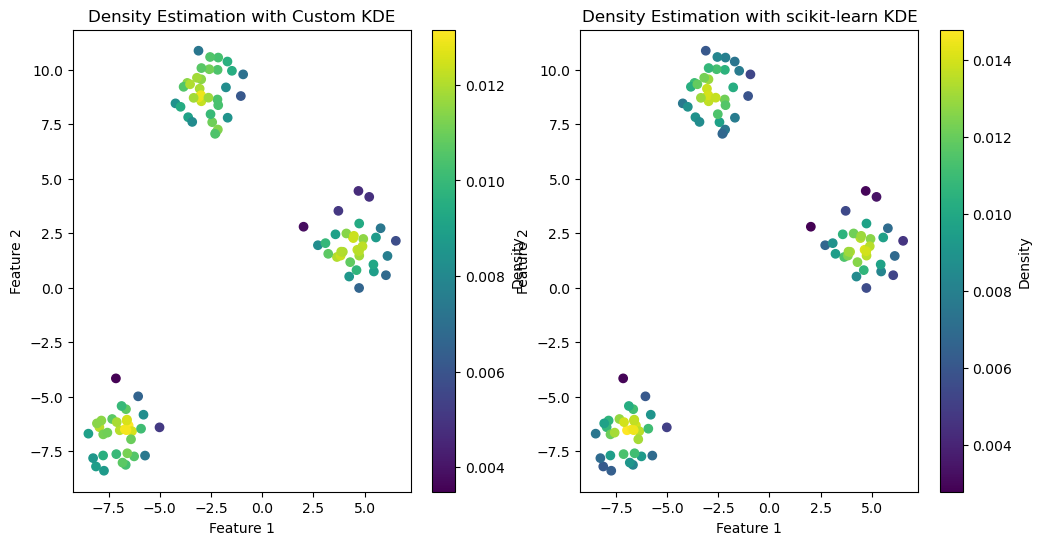

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from lund.utils import DensityEstimator


# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

density_estimator = DensityEstimator(DensityNN=5, Sigma0=1.0)
p_custom = density_estimator.kde(X)

# using sklearn as comparison
kde_sklearn = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X)
log_density = kde_sklearn.score_samples(X)
p_sklearn = np.exp(log_density)

p_custom /= np.sum(p_custom)
p_sklearn /= np.sum(p_sklearn)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sc1 = ax[0].scatter(X[:, 0], X[:, 1], c=p_custom, cmap='viridis')
ax[0].set_title('Density Estimation with Custom KDE')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')
fig.colorbar(sc1, ax=ax[0], label='Density')

sc2 = ax[1].scatter(X[:, 0], X[:, 1], c=p_sklearn, cmap='viridis')
ax[1].set_title('Density Estimation with scikit-learn KDE')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
fig.colorbar(sc2, ax=ax[1], label='Density')

plt.show()